In [1]:
# jupyter tricks
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# ML basics & OLS
### The fancy stuff

## Part 3 - Introduction to ML

### What can machines learn?
supervised learning:
- regression
- classification

unsupervised learning:
- clustering
- mapping

### How do machines learn?

- optimisation
    - highest accuracy
    - lowest variance

$RMSE$ = $\sqrt{\frac{\sum_{i=1}^{n}e_i^2}{n}}$  
$R^2$ = $1 - \frac{SSR}{SST}$ </br> </br> </br>
$acc$ = $\frac{\sum_{i=1}^{n} 1 - |\hat y_i - y_i|}{n}$  
$entrophy$ = $\sum_{i=1}^{J}-p_i * log_2(p_i)$  
$gini$ = $1 - \sum_{i=1}^{J} p_i^2$  
<br><br>
and like milion other metrics

### Regression problems?

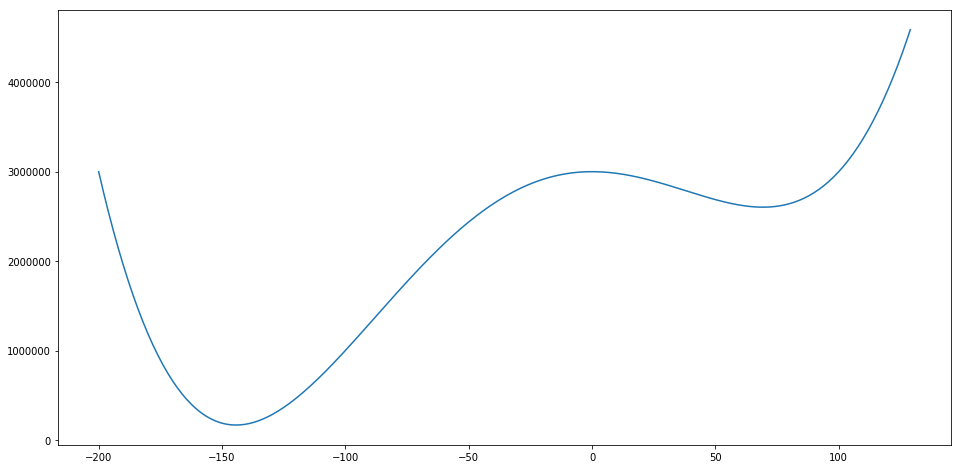

In [2]:
x = list(range(-200, 130))
inp = pd.DataFrame({'x':x, 'error': [0.01 * i**4 + i**3 - 200*i**2 + 3*10**6 for i in x]})
_ = plt.figure(figsize = (16,8))
_ = plt.plot(inp.x, inp.error)
plt.show()

### Classification problems?

Assume that 0.1 % of population has an illness.  
We want to build a model that will predict (based on some symptoms),  
whether the individual is healthy or not.  

Our model is able to predict with 99.9 % accuracy.

- What is the problem?

####  inbalanced classification
- the most accurate prediction is to say everyone is healthy
- not very helpful
- how to spot?
    - EDA
    - confusion matrix

In [3]:
conf = np.array([99.9, 0.1, 0, 0]).reshape(2, 2)
conf = pd.DataFrame(conf)
conf.set_index(pd.Index(["pred=1", "pred=0"])).rename({0:"actual=1",1:"actual=0"}, axis = 1)

,actual=1,actual=0
pred=1,99.9,0.1
pred=0,0.0,0.0


#### solution?
- oversample?
- undersample?
- hybrid
- weighting


### Statistics vs ML?
main difference = **DATA**

<div style="float: left; width: 50%;">

<b>statistics</b><br>  

based on mathematical methods<br>
very strict framework<br>
sometimes you best option<br>  
</div>

<div style="float: right; width: 50%;">

<b>ML</b><br>  

based on computer methods<br>
loose framework<br>
working in limit (assymptotic)<br>
</div>

- estimation vs measuring the error
    - efficiency
- assumptions vs data

<hr>

- variance bias trade-off
- complexity vs accuracy
- concept similar to degrees of freedom

## Part 4 - Linear regression

<font color = 'red'><b>O</b></font>rdinary <font color = 'red'><b>L</b></font>east <font color = 'red'><b>S</b></font>quares  
<font color = 'red'><b>L</b></font>inear <font color = 'red'><b>M</b></font>odels  
Line fitting?

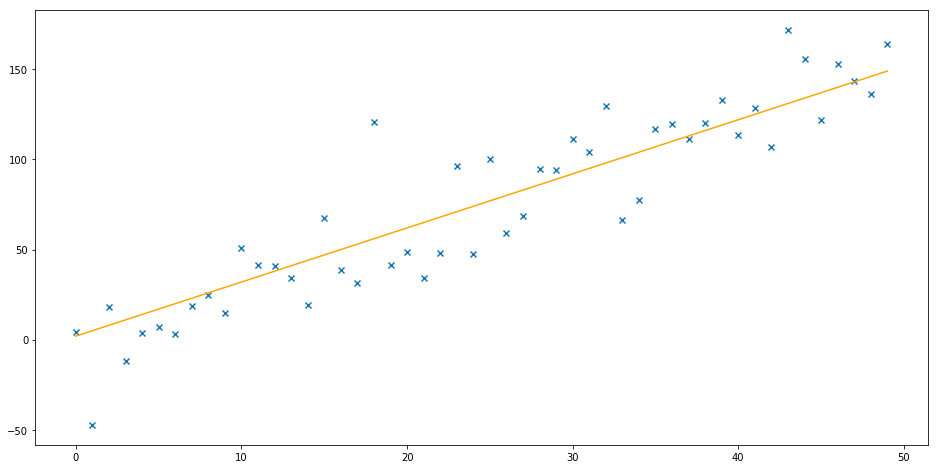

In [4]:
x=list(range(50))
y = [3*i + 2 + np.random.normal(scale = 20) for i in x]
_ = plt.figure(figsize = (16,8))
_ = plt.scatter(x, y, marker = 'x')
_ = plt.plot(x, [3*i + 2 for i in x], color = 'orange')

### Intro
originally a statistical tool  
adopted into ML  
incredibly useful framework
- baseline model
- quick learning = $O(nk^2)$
    - <font color = 'red'><b>ONLY for large number of variables !!! </b></font>
   


### Objective
$y = x\beta + \epsilon$  

y = true value, $n \times 1$  
x = predictors, $n \times k$  
$\beta$ = coefficients, $k \times 1$  
$\epsilon$ = random noise, $n \times 1$



##### minimise errors:  
$\epsilon = y - x\beta$

##### actually, squared errors:  
$\epsilon^2 = (y - x\beta)^2$

### Two approaches

<div style="float: left; width: 50%;"><br>
    <font size=3><b>statistics</b></font><br>
    Gaus-Markov assumptions (6)<br>
    process:<br>
    <ol>
        <li>estimate</li>
        <li>run statistical tests</li>
        <li>check significance</li>
    </ol>
</div>

<div style="float: right; width: 50%;"><br>
    <font size=3><b>ML</b></font><br>
    process:<br>
    <ol>
        <li>estimate</li>
        <li>measure the performance</li>
    </ol>
    if you want to reliably predict out of range of the data<br>
    <b>&rArr; go back to Gaus-Markov</b>
</div>

### Tips & Tricks - OLS in Python

In [5]:
"""
# STATISTICS
import statsmodels.api as sm
lm_estimate = sm.OLS(y, x).fit()
# y = N x 1 (numpy ndarray, pandas Series)
# x = N x K (numpy ndarray, pandas DataFrame)
lm_estimate.summary()
resid = lm_estimate.resid

# ML
from sklearn.linear_model import LinearRegression as ols
sklr_estimate = ols().fit(reg_x, reg_y
sklr_estimate.coef_
resid = sklr_estimate.predict(reg_x) - reg_y
"""
display()

## Part 5 - LASSO

<font size=4><b>Something is rotten in the OLS.</b><font><br>
<font size=2>-Shakespear. If you don't believe, try to prove me wrong...</font>

### OLS overview
- very simplistic
- very powerful (depends on meeting the assumptions)
- very scalable with number of observations (rows)


### The curse of dimensionality
- OLS gives always nonzero estimates
    - for every coefficient
- for large number of variables it is $O(C^3)$
    - one doesn't simply estimate a cubic time complexity model

### How about we punish the nonzero coefficients?

$\underset{\beta}{\operatorname{argmin}} = \sum_{i=1}^{n}(y_i - x_i^T\beta_i)^2 + \alpha\sum_{j=1}^{k}|\beta_j|$  
<br>
$\alpha$ = scalling parameter:

**coefficients**
- can be in units (1% increase every year)
- in thousands (wage increase with year of work experience)
- and anything else

**residuals**
- can be in units (banknote sizes in milimeters based on when it was manufactured)
- milions (GDP predictions)
- anything else

### Tips & Tricks - LASSO in Python

In [6]:
"""
# SINGLE MODEL
from sklearn.linear_model import LinearRegression as Lasso
lasso = Lasso(alpha = 0.00017433288221999874).fit(x, y)
lasso.coef_

# CV MODEL
from sklearn.model_selection import GridSearchCV
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)
n_folds = 5

tuned_parameters = [{'alpha': alphas}]

cvl = GridSearchCV(lasso, tuned_parameters, cv = n_folds, n_jobs = -1)
cvl.fit(x, y)

scores = cvl.cv_results_['mean_test_score']
scores_std = cvl.cv_results_['std_test_score']
std_error = scores_std / np.sqrt(n_folds)
"""
display()